In [1]:
import LinearAlgebra as la
import Plots as plt

In [2]:
X = 10.0 # max x
I = 1000 # gridpoints - 1

δx = 2 * X / I
xs = -X:δx:X
N = length(xs)

1001

In [3]:
struct Well
    pos::Float64
    width::Float64
    strength::Float64
end
Well(;pos, width, strength) = Well(pos, width, strength)

Well

In [10]:
L = Well(pos = -5, width = 0.5, strength = 14)
R = Well(pos = 5, width = 0.5, strength = 12)

Well(5.0, 0.5, 12.0)

In [11]:
function V(x, W::Well)
    return -W.strength * exp.( -((x .- W.pos) / (2 * W.width)).^2 )
end


V_L = V(xs, L)
V_R = V(xs, R)
V_tot = V_L .+ V_R;

In [16]:
H_L = la.SymTridiagonal(V_L .+ V_R .+ 1/δx^2, repeat([-1/2δx^2], N))
H_R = la.SymTridiagonal(V_R .+ 1/δx^2, repeat([-1/2δx^2], N));

In [17]:
eigenL = la.eigen(H_L)
Ψ_Ls = eigenL.vectors ./ √δx
E_Ls = eigenL.values

eigenR = la.eigen(H_R)
Ψ_Rs = eigenR.vectors ./ √δx
E_Rs = eigenR.values;

In [18]:
function subscript(i)
    return join('₀' + d for d in digits(i)) # '₀' + 1 = '₁' and so on. Unicode goodness
end

subscript (generic function with 1 method)

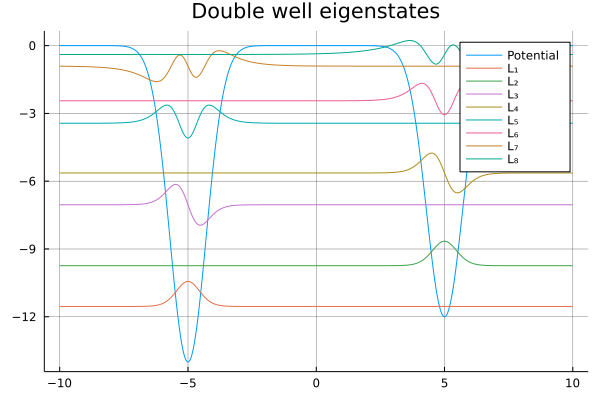

In [31]:
fig = plt.plot(;gridalpha = 0.5, title = "Double well eigenstates")
plt.plot!(xs, V_tot; label = "Potential")

for i in 1:8
    plt.plot!(xs, Ψ_Ls[:, i] .+ E_Ls[i]; label = "L$(subscript(i))")
    #plt.plot!(xs, Ψ_Rs[:, i] .+ E_Rs[i]; label = "R$(subscript(i))")
end
fig

In [34]:
sum(Ψ_Ls[:, 4] .- Ψ_Rs[:, 2])

2.3351623582503916e-10